Ejemplo 2. Binary HIP 67620

Objetivo: usar radial velocity data of the solar twin HIP 67620 to estimate the projected mass, 
separation and other orbital parameters of its companion.

In [1]:
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import astropy.units as u

from radial import estimate, dataset


Extract the data from the text files located in the **test** folder. they will be stored in the ***ReVDataSet*** objects, which are defined in the ***dataset*** modules.  

In [2]:
#

harps = dataset.RVDataSet( file = './tests/HIP67620_HARPS.dat',    # File name
                           t_offset = -2.45E6,                       # Time offset, units of time
                           rv_offset = 'subtract_mean',              # RV offset
                           instrument_name = 'HARPS',
                           target_name = 'HIP 67620',
                           skiprows = 1,                             # Num of rows to skip in the data file
                           t_col = 5,                                # Col corresponding to time, in the data file
                           rv_col = 6,                               # Col corresponding to radial vel in the ""
                           rv_unc_col = 7 )                          # Col uncertainties in RV


aat  = dataset.RVDataSet( file = './tests/HIP67620_AAT.dat',
                          t_offset = -2.45E6,
                          rv_offset = 'subtract_mean',
                          instrument_name = 'AATPS',
                          target_name = 'HIP 67620',
                          delimiter = ',')


w16 = dataset.RVDataSet (file = './tests/HIP67620_WF16.dat',
                        t_offset = -5E4,
                        rv_offset = 'subtract_mean',
                        instrument_name = 'W16',
                        target_name = 'HIP 67620',
                        t_col = 1,
                        rv_col = 3,
                        rv_unc_col = 4)

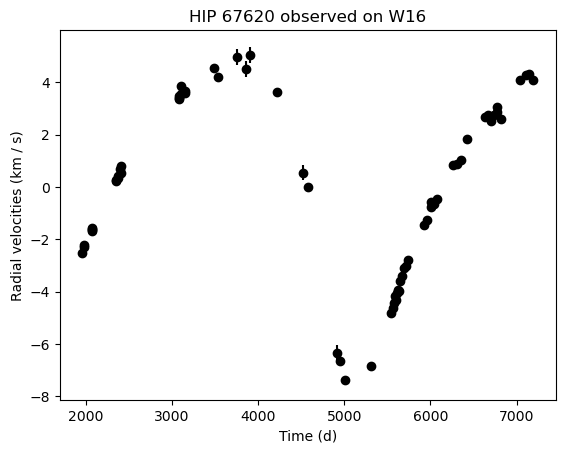

In [3]:
w16.plot()

Having the data, the next step is estimate the orbital parameters.
To do this we use the methods and functions inside the ***estimate*** module.

First we need to provide an initial guess for the orbital parameters.

* k: radial velocity semi-aplitude. $ K $ (m/s).
* period: orbital period, $ T $ (in days).
* t0: time of periastron passage $ t0 $ (in days). /* specifies the exact time at which an orbiting body is
  closest to the primary body */
  ejemplo: el time of periastron pasage es January 1, 2020. 

* omega: argument of periapse $ \omega $ (in radians).
* ecc: eccentricity of the orbit, $ e $.
* gamma_x: RV offset $ \gamma $ of the dataset number $ X $ (in m/s)

A first guess is an educated guess based on a periodogram and or/ simple inspection of the data.

In [4]:
#
# guess is a dictionary, which is a special type of "list" in python.
# Instead of being indexed by a number, the items in a dictionary
# are indexed by a key, (which is a string)

guess = { 'k': 6000,
          'period': 4000,
          't0': 5000,
           'omega': 180 * np.pi / 180,
           'ecc': 0.3,
           'gamma_0': 0,
           'gamma_1': 0,
           'gamma_2': 0 }

Now we need to instantiate (?) a FullOrbit object with the datasets and our guess, 
as well as the parametrisation option we want to use. Then, we plot it. 

El Plot no Jala


In [5]:
#

estim = estimate.FullOrbit( datasets = [harps, aat, w16],
                            guess = guess,
                            parametrization = 'mc10')



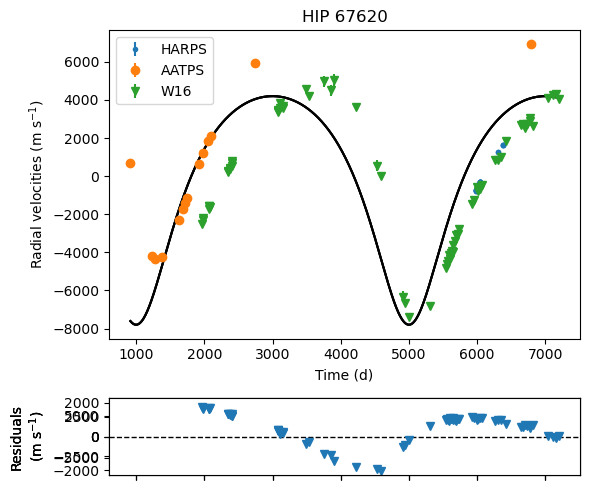

In [6]:
plot =  estim.plot_rvs(plot_guess = True, fold = False, legend_loc = 2)

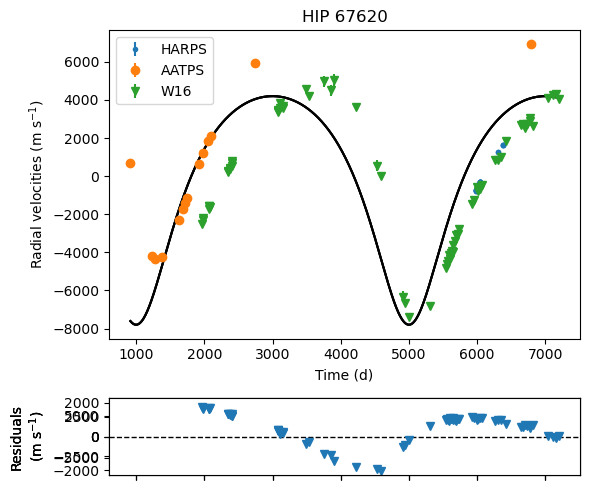

In [7]:
# esto no jala. Necesito encontar la manera de graficar de otro modo.

plot =  estim.plot_rvs(plot_guess = True, fold = False, legend_loc = 2)
plt.show()

Estimación de los parámetros orbitales

In [8]:
#

result = estim.lmfit_orbit(update_guess = True)


log_k = 3.6245250364261814
log_period = 3.621180081686564
t0 = 4329.609192550613
omega = 2.0500603022434563
ecc = 1.0001712074411928e-06
gamma_0 = 0.013167239838853671
gamma_1 = -0.02382559830202613
gamma_2 = -0.02548444203626321


plot de la solución obtenida

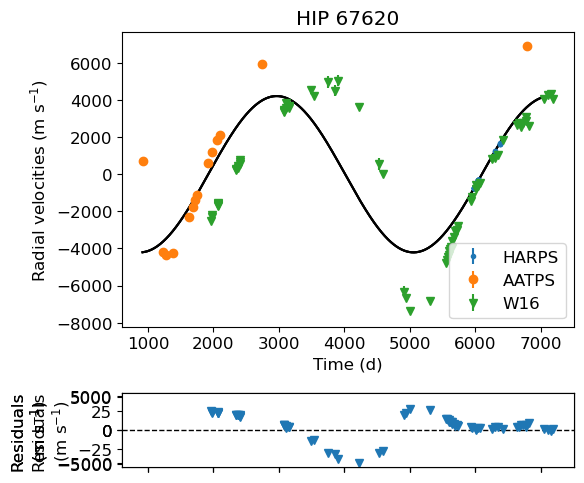

In [9]:
#

pylab.rcParams['font.size'] = 12
fig, gs = estim.plot_rvs(plot_guess = True, fold = False, legend_loc = 4)

In [10]:
#

estim.emcee_orbit(nwalkers = 16, nsteps = 1000, nthreads = 1 )#

/Users/eperezj/miniconda3/envs/radial/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


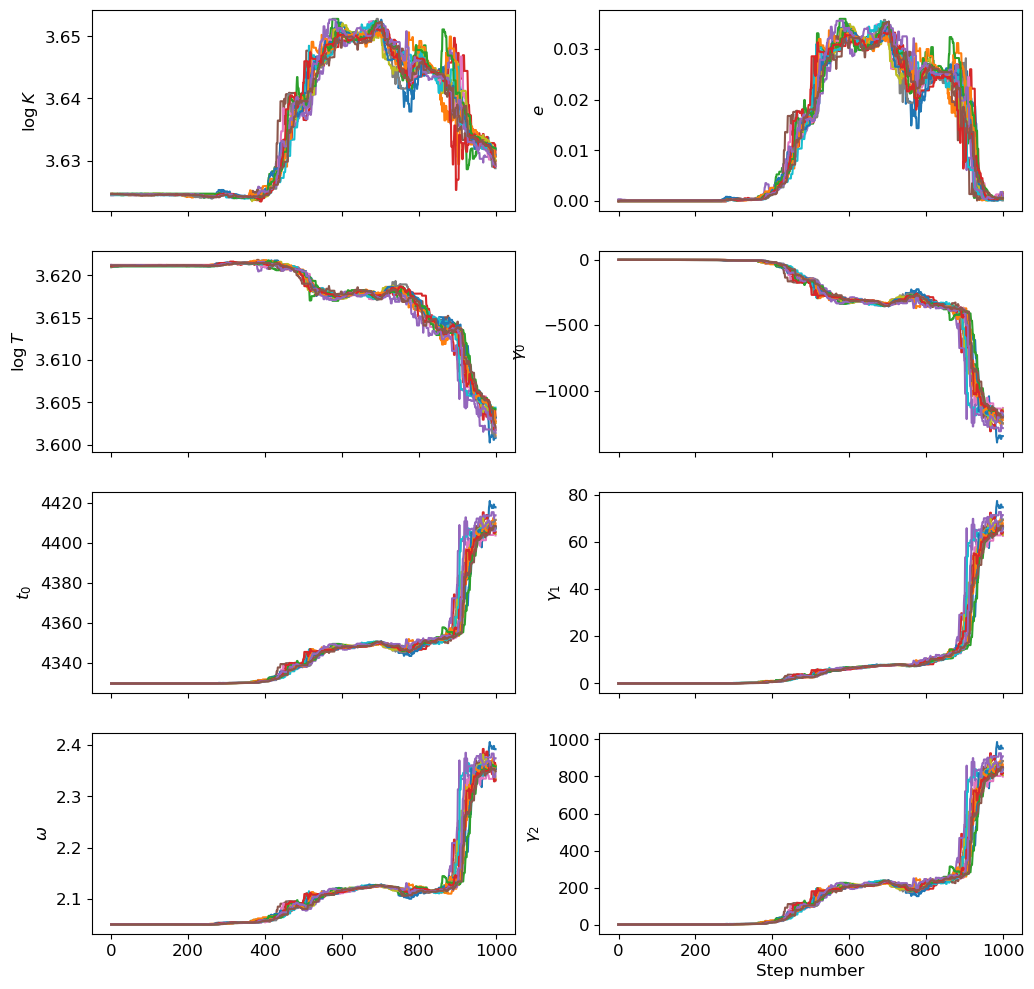

In [11]:
#

estim.plot_emcee_sampler()
plt.show()

In [12]:
#

estim.make_chains(500)

array([[ 3.63928239e+00,  3.62051769e+00,  4.33827834e+03, ...,
        -1.47601631e+02,  2.79380704e+00,  9.89713079e+01],
       [ 3.63928239e+00,  3.62051769e+00,  4.33827834e+03, ...,
        -1.47601631e+02,  2.79380704e+00,  9.89713079e+01],
       [ 3.63928239e+00,  3.62051769e+00,  4.33827834e+03, ...,
        -1.47601631e+02,  2.79380704e+00,  9.89713079e+01],
       ...,
       [ 3.62986690e+00,  3.60238900e+00,  4.40850404e+03, ...,
        -1.20717433e+03,  6.68891914e+01,  8.51885717e+02],
       [ 3.62978962e+00,  3.60232272e+00,  4.40818896e+03, ...,
        -1.20241452e+03,  6.65904745e+01,  8.48480240e+02],
       [ 3.62941455e+00,  3.60200241e+00,  4.40830082e+03, ...,
        -1.20399139e+03,  6.67041849e+01,  8.49599011e+02]])